In [4]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("gas_turbines.csv")
df.head()


Saving gas_turbines.csv to gas_turbines.csv


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df.isnull().sum()

,0
AT,0
AP,0
AH,0
AFDP,0
GTEP,0
TIT,0
TAT,0
TEY,0
CDP,0
CO,0


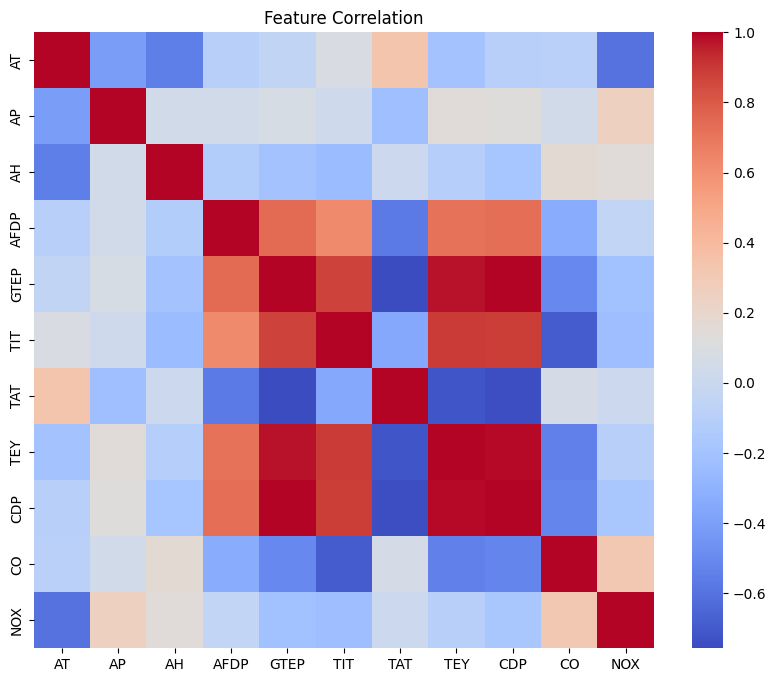

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
#TEY is strongly correlated with:
#TIT
#TAT
#CDP
#Ambient variables also influence yield but indirectly

In [7]:
X = df.drop('TEY', axis=1)
y = df['TEY']

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
X_train_scaled

array([[ 0.47056415, -0.81350628,  0.56176672, ..., -1.53396833,
         1.38554193, -1.26033592],
       [ 1.87696832, -0.23812732, -0.8085116 , ...,  0.19687597,
         0.38193337, -0.43948609],
       [-1.06016627,  0.3683532 ,  0.02618307, ...,  1.70558468,
        -0.74786202, -0.55565494],
       ...,
       [-0.18266419,  0.25949772, -0.22487857, ..., -1.51311479,
         1.66852278, -0.01228763],
       [-1.63532714,  0.53941181,  0.66076877, ..., -1.46506096,
         1.45834724,  4.35995498],
       [-1.55058329,  2.0633885 ,  0.26991392, ..., -0.37704988,
         0.11086035,  1.22540899]])

In [21]:
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',   # REGRESSION LOSS
    metrics=['mean_absolute_error']
)


In [38]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=100,
    verbose=1
)


Epoch 1/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 18027.3008 - mean_absolute_error: 133.3495 - val_loss: 17948.7188 - val_mean_absolute_error: 133.0503
Epoch 2/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 17975.7305 - mean_absolute_error: 133.1473 - val_loss: 17948.7188 - val_mean_absolute_error: 133.0503
Epoch 3/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 18029.3789 - mean_absolute_error: 133.3540 - val_loss: 17948.7188 - val_mean_absolute_error: 133.0503
Epoch 4/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18021.1230 - mean_absolute_error: 133.3210 - val_loss: 17948.7188 - val_mean_absolute_error: 133.0503
Epoch 5/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18034.2520 - mean_absolute_error: 133.3329 - val_loss: 17948.7188 - val_mean_absolute_error: 133.0503
Epoch 6/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18052.7852 - mean_absolute_error: 133.4251 - val_loss: 17948.7188 - val_mean_absolute_error: 133.0503
Epoch 7/100
301/301 ━━

In [39]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17874.4609 - mean_absolute_error: 132.7470
Test MSE: 17927.154296875
Test MAE: 132.95399475097656


In [37]:
pred=model.predict(X_test_scaled)
pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [40]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


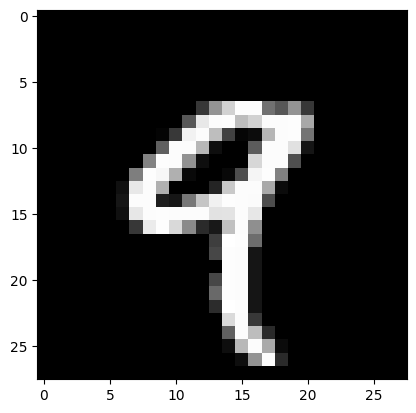

In [41]:
plt.imshow(X_train[4],cmap='gray')
plt.show()

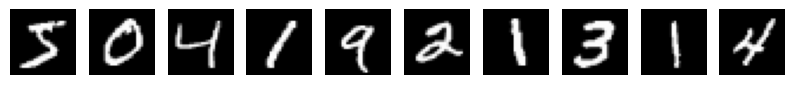

In [42]:
plt.figure(figsize=(10,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.axis('off')
plt.show()